# Cumulative totals
Plot cumulative totals of metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
%matplotlib inline

In [2]:
df = pd.read_csv('../data/mytweets.csv',)
df['date_time'] = pd.to_datetime(df['created_at'])
df.head()

,created_at,favorite_count,retweet_count,date_time
0,Sat Jan 12 15:55:00 +0000 2019,8,0,2019-01-12 15:55:00
1,Fri Jan 11 14:55:00 +0000 2019,4,0,2019-01-11 14:55:00
2,Thu Jan 10 14:55:00 +0000 2019,9,2,2019-01-10 14:55:00
3,Thu Jan 10 02:57:53 +0000 2019,4,0,2019-01-10 02:57:53
4,Tue Jan 01 06:38:47 +0000 2019,5,0,2019-01-01 06:38:47


In [3]:
df["date_time"] = pd.to_datetime(df["created_at"])

In [4]:
ts_df = df.set_index("date_time")
ts_df.sort_index(inplace=True)

Add cumulative sum columns

In [5]:
ts_df["cumulative_favorites"] = ts_df["favorite_count"].cumsum()
ts_df["cumulative_retweets"] = ts_df["retweet_count"].cumsum()
ts_df['count'] = np.arange(len(df))

In [6]:
ts_df.head()

,created_at,favorite_count,retweet_count,cumulative_favorites,cumulative_retweets,count
date_time,,,,,,
2015-01-01 18:32:06,Thu Jan 01 18:32:06 +0000 2015,0,0,0,0,0
2015-01-02 18:46:53,Fri Jan 02 18:46:53 +0000 2015,1,0,1,0,1
2015-01-02 19:23:00,Fri Jan 02 19:23:00 +0000 2015,0,0,1,0,2
2015-01-02 19:23:08,Fri Jan 02 19:23:08 +0000 2015,0,0,1,0,3
2015-01-02 19:23:13,Fri Jan 02 19:23:13 +0000 2015,0,0,1,0,4


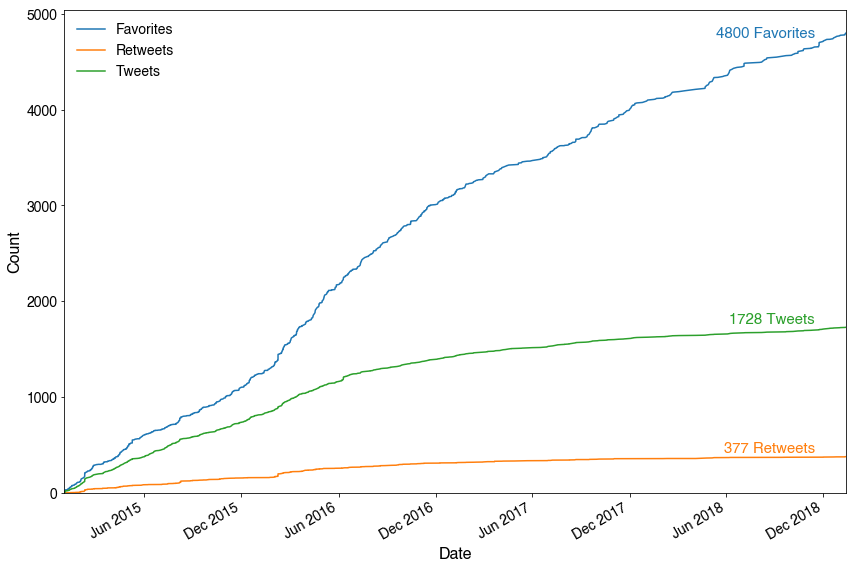

In [50]:
# Make Figure
fig = plt.figure(figsize=(12,8))
ax = plt.gca()

# Plot Stuff
ts_df["cumulative_favorites"].plot(label="Favorites", grid=True)
ts_df["cumulative_retweets"].plot(label="Retweets", grid=True)
ts_df["count"].plot(label="Tweets")

# Label it
plt.xlabel("Date", fontsize=16)
plt.ylabel("Count", fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
plt.ylim(ymin=0)
plt.legend(fontsize=14,frameon=False)

# Annotation locations
fav_max = ts_df["cumulative_favorites"].max()
rt_max = ts_df["cumulative_retweets"].max()
tw_max = ts_df["count"].max()

# Annotations
plt.annotate("{0} Favorites".format(fav_max), xy=(0.96,fav_max-50),
             xycoords=ax.get_yaxis_transform(),
             ha='right',fontsize=15, color=ax.lines[0].get_color())
plt.annotate("{0} Retweets".format(rt_max), xy=(0.96,rt_max+45),
             xycoords=ax.get_yaxis_transform(),
             ha='right',fontsize=15, color=ax.lines[1].get_color())
plt.annotate("{0} Tweets".format(tw_max), xy=(0.96,tw_max+45),
             xycoords=ax.get_yaxis_transform(),
             ha='right',fontsize=15, color=ax.lines[2].get_color())
plt.tight_layout()
plt.savefig('../plots/totals')